# Homework 7

### NGUYEN, Huu Canh
### SID: 20818623

## Q1. PageRank

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('univ_cn.mat')
W = mat['W_cn']
webpage = np.array([web[0] for web in mat['univ_cn'][0]])
rank = mat['rank_cn'].reshape(-1)

### a. PageRank

In [2]:
# Compute the row-normalized transition matrix T
D = W.sum(axis=1)
mask = D == 0
D_inv = np.zeros(D.shape)
D_inv[~mask] = 1/D[~mask]
T = np.diag(D_inv) @ W
T[:,mask] = 0

# Set the hyperparameters alpha
alpha = 0.85

# Compute the PageRank scores for each alpha
score_page = np.zeros(W.shape[0])

T1 = alpha * T + (1 - alpha) * np.ones(W.shape) / W.shape[0]
evals, evecs = np.linalg.eig(T1.T)
evec = evecs[:, np.argmax(evals)]
score_page = evec / np.sum(evec)

# Print the top 5 universities by PageRank score with alpha=0.85
pagerank = np.argsort(score_page)[::-1]
print('Top 5 universities by PageRank')
print(webpage[pagerank[:5]])

Top 5 universities by PageRank
['tsinghua.edu.cn' 'pku.edu.cn' 'sjtu.edu.cn' 'nju.edu.cn' 'uestc.edu.cn']


### b. HITS

In [3]:
# Compute the out-degree and in-degree scores
score_out = D
score_in = W.sum(axis=0)

# Print the top 5 universities by out-degree score (hub ranking)
idx = np.argsort(score_out)[::-1]
print('Top 5 universities by relative hub ranking')
print(webpage[idx[:5]])

# Print the top 5 universities by in-degree score (authority ranking)
idx = np.argsort(score_in)[::-1]
print('Top 5 universities by relative authority ranking')
print(webpage[idx[:5]])

# Compute the HITS rank
u, s, vt = np.linalg.svd(W)
u1 = u[:, 0] / np.sum(u[:, 0])
v1 = vt[0, :] / np.sum(vt[0, :])

# Print the top 5 universities by hub ranking
hits_hub = np.argsort(u1)[::-1]
print('HITS top 5 universities by hub ranking')
print(webpage[hits_hub[:5]])

# Print the top 5 universities by authority ranking
hits_aut = np.argsort(v1)[::-1]
print('HITS top 5 universities by authority ranking')
print(webpage[hits_aut[:5]])

Top 5 universities by relative hub ranking
['pku.edu.cn' 'ustc.edu.cn' 'zsu.edu.cn' 'njau.edu.cn' 'sjtu.edu.cn']
Top 5 universities by relative authority ranking
['tsinghua.edu.cn' 'pku.edu.cn' 'uestc.edu.cn' 'sjtu.edu.cn' 'nju.edu.cn']
HITS top 5 universities by hub ranking
['pku.edu.cn' 'ustc.edu.cn' 'zsu.edu.cn' 'sjtu.edu.cn' 'zju.edu.cn']
HITS top 5 universities by authority ranking
['tsinghua.edu.cn' 'pku.edu.cn' 'uestc.edu.cn' 'sjtu.edu.cn' 'nju.edu.cn']


### c. Compare

In [4]:
def kendall(r1, r2):
    # Define the number of pairwise disagreements
    disagreements = 0
    for i in range(len(r1)):
        for j in range(i + 1, len(r1)):
            if (r1[i] < r1[j] and r2[i] > r2[j]) or (r1[i] > r1[j] and r2[i] < r2[j]):
                disagreements += 1

    # Compute the total number of pairwise comparisons
    n = len(r1)
    total_comparisons = n * (n - 1) / 2

    # Compute the Kendall distance
    kendall_distance = disagreements / total_comparisons
    return kendall_distance

print(f'Distance of PageRank:               {kendall(pagerank, rank)}')
print(f'Distance of HITS hub ranking:       {kendall(hits_hub, rank)}')
print(f'Distance of HITS authority ranking: {kendall(hits_aut, rank)}')

Distance of PageRank:               0.24105263157894738
Distance of HITS hub ranking:       0.3003508771929825
Distance of HITS authority ranking: 0.2063157894736842


### d. *$\alpha$* varies

In [5]:
# Set the hyperparameters alpha
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.85, 0.9]
kendall_d = []
for alpha in alphas:
    T1 = alpha * T + (1 - alpha) * np.ones(W.shape) / W.shape[0]
    evals, evecs = np.linalg.eig(T1.T)
    evec = evecs[:, np.argmax(evals)]
    score_page = evec / np.sum(evec)
    pagerank = np.argsort(score_page)[::-1]
    print(f'alpha = {alpha}: {webpage[pagerank[:5]]}')
    kendall_d.append(kendall(pagerank, rank))

alpha = 0.1: ['tsinghua.edu.cn' 'pku.edu.cn' 'uestc.edu.cn' 'nju.edu.cn' 'sjtu.edu.cn']
alpha = 0.2: ['tsinghua.edu.cn' 'pku.edu.cn' 'uestc.edu.cn' 'nju.edu.cn' 'sjtu.edu.cn']
alpha = 0.3: ['tsinghua.edu.cn' 'pku.edu.cn' 'nju.edu.cn' 'sjtu.edu.cn' 'uestc.edu.cn']
alpha = 0.4: ['tsinghua.edu.cn' 'pku.edu.cn' 'sjtu.edu.cn' 'nju.edu.cn' 'uestc.edu.cn']
alpha = 0.5: ['tsinghua.edu.cn' 'pku.edu.cn' 'sjtu.edu.cn' 'nju.edu.cn' 'uestc.edu.cn']
alpha = 0.6: ['tsinghua.edu.cn' 'pku.edu.cn' 'sjtu.edu.cn' 'nju.edu.cn' 'uestc.edu.cn']
alpha = 0.7: ['tsinghua.edu.cn' 'pku.edu.cn' 'sjtu.edu.cn' 'nju.edu.cn' 'uestc.edu.cn']
alpha = 0.85: ['tsinghua.edu.cn' 'pku.edu.cn' 'sjtu.edu.cn' 'nju.edu.cn' 'uestc.edu.cn']
alpha = 0.9: ['tsinghua.edu.cn' 'pku.edu.cn' 'sjtu.edu.cn' 'nju.edu.cn' 'uestc.edu.cn']


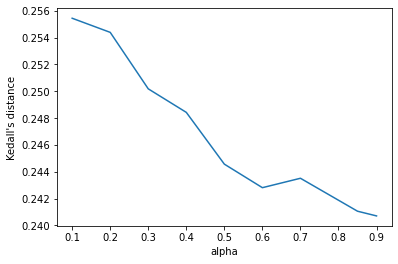

In [6]:
# Create a scatter plot of the data
plt.plot(alphas, kendall_d)

# Add labels and a title
plt.xlabel('alpha')
plt.ylabel("Kedall's distance")

# Show the plot
plt.show()

In general, larger values of $\alpha$ tend to produce more stable rankings. Intuitively, this is because larger values of $\alpha$ place more emphasis on the underlying structure of the graph, while smaller values of $\alpha$ allow for more random jumps between nodes. When $\alpha$ is large, the PageRank algorithm is more likely to converge to a unique ranking, since the algorithm is primarily driven by the link structure of the graph. When $\alpha$ is small, the PageRank algorithm is more likely to produce different rankings for different runs of the algorithm, since the algorithm is more influenced by the random teleportation.

## 4. Spectral Bipartition

In [7]:
mat = scipy.io.loadmat('karate.mat')
A = mat['A']
# Compute the degree matrix D
D = np.diag(np.sum(A, axis=1))

In [8]:
def is_connected(adj_matrix):
    """
    Check if a graph is connected given its adjacency matrix.

    Args:
    adj_matrix: A square matrix representing the adjacency matrix of the graph.

    Returns:
    A boolean value indicating if the graph is connected.
    """
    n = len(adj_matrix)
    visited = set()
    stack = [0]  # start from vertex 0
    while stack:
        vertex = stack.pop()
        visited.add(vertex)
        for neighbor in range(n):
            if adj_matrix[vertex][neighbor] == 1 and neighbor not in visited:
                stack.append(neighbor)
    return len(visited) == n

print(f'A is connected? {is_connected(A)}')

A is connected? True


### a. Second smallest generalized eigenvector

In [9]:
# Compute the Laplacian matrix L
L = D.astype(np.float64) - A.astype(np.float64)

# Compute the generalized eigenvalues and eigenvectors of L
eigvals, eigvecs = np.linalg.eig(L)

# Find the index of the second smallest eigenvalue
idx = np.argsort(eigvals)[1]

# Extract the corresponding eigenvector
f = eigvecs[:, idx]

### b. Sort the nodes

In [10]:
# Sort the nodes based on the entries of the eigenvector f
sorted_nodes = np.argsort(f)

### c. Find the optimal subset

In [11]:
af = []
for i in range(1, A.shape[0]):
    Si = sorted_nodes[:i]
    S_ = sorted_nodes[i:]
    Cut_S = np.sum(A[Si][:,S_])
    af.append(Cut_S/min(i, A.shape[0]-i))
    
alpha_f = min(af)
index = af.index(alpha_f)
print(f'alpha_f: {alpha_f}. First cluster includes {sorted_nodes[:index+1]}')

alpha_f: 0.625. First cluster includes [26 29 18 15 22 14 20 25 23 24 32 27 33 31 28  9 30  8]


### d. Check if  $\lambda_2 > \alpha_f$

In [12]:
eigvals[idx] > alpha_f

False

### e. Cheeger ratio

In [13]:
indices_plus = np.where(f >= 0)[0]
indices_minus = np.where(f < 0)[0]
Cut_S = np.sum(A[indices_plus][:,indices_minus])
h_Splus = Cut_S/min(len(indices_plus), len(indices_minus))

In [14]:
print(f'Cheeger ratio > a_f:      {h_Splus> alpha_f}')
print(f'Cheeger ratio > lambda_2: {h_Splus> eigvals[idx]}')

Cheeger ratio > a_f:      True
Cheeger ratio > lambda_2: True


## 5. Degree Corrected Stochastic Block Model (DCSBM)

In [15]:

def generate_DCSBM(n, k, p, theta):
    """
    Generates a synthetic network using the DCSBM.

    Parameters:
        n: int
            Number of nodes in the network.
        k: int
            Number of communities.
        p: ndarray
            Probability matrix of connection within a community.
            Shape should be (k, k).
        theta: ndarray
            Array of node degrees.
            Shape should be (n,).

    Returns:
        A: ndarray
            The adjacency matrix of the generated network.
            Shape is (n, n).
        labels: ndarray
            The community assignments for each node.
            Shape is (n,).
    """
    # Generate community assignments for each node
    labels = np.random.choice(k, size=n)

    # Generate node degrees
    degrees = np.random.poisson(theta)

    # Initialize empty adjacency matrix
    A = np.zeros((n, n))

    # Add edges between nodes based on community assignments and probability matrix
    for i in range(n):
        for j in range(i+1, n):
            if labels[i] == labels[j]:
                prob = p[labels[i]][labels[j]]
                if np.random.rand() < prob:
                    A[i, j] = A[j, i] = 1

    return A, labels


n = 500
k = 4
p = np.array([[0.1, 0.01, 0.01, 0.01],
              [0.01, 0.1, 0.01, 0.01],
              [0.01, 0.01, 0.1, 0.01],
              [0.01, 0.01, 0.01, 0.1]])
theta = np.ones(n)
A, labels = generate_DCSBM(n, k, p, theta)
d = np.sum(A, axis=1)
D = np.diag(d)

In [16]:
# algorithm A
from sklearn.cluster import KMeans
from scipy.linalg import eig

eigvals, eigvecs = eig(D-A, D)
idx = np.argsort(eigvals)[::-1][n-k:n]
top_evecs = eigvecs[:, idx]

kmeans = KMeans(n_clusters=k).fit(top_evecs)
cidxa = kmeans.labels_

In [17]:
# Algorithm B

# Compute the Laplacian matrix of the graph
L = np.diag(1/np.sqrt(d)) @ (D-A) @ np.diag(1/np.sqrt(d))

# Compute the eigenvalues and eigenvectors of the Laplacian matrix
evals, evecs = eig(L)

# Sort the eigenvectors by increasing eigenvalues and extract the k smallest ones
idx = np.argsort(evals)[:k]
eigvecs_smallest = evecs[:,idx]

# Normalize the rows of the eigenvector matrix to have unit norm
for i in range(A.shape[0]):
    eigvecs_smallest[i,:] /= np.linalg.norm(eigvecs_smallest[i,:], 2)

# Cluster the nodes using k-means on the normalized eigenvector matrix
kmeans = KMeans(n_clusters=k).fit(eigvecs_smallest)
cidxb = kmeans.labels_

In [18]:
from sklearn.metrics.cluster import normalized_mutual_info_score
# Compute NMI
nmi_a = normalized_mutual_info_score(labels, cidxa)
print(f"NMI of algo A: {nmi_a:4f}")
nmi_b = normalized_mutual_info_score(labels, cidxb)
print(f"NMI of algo B: {nmi_b:4f}")

NMI of algo A: 1.000000
NMI of algo B: 1.000000
